In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
sig = gpd.read_file('./data/sig_20230729/sig.shp', encoding='cp949')
sig.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


In [3]:
seoul = sig[sig['SIG_CD'].str.startswith('11')]

In [4]:
seoul.drop(['SIG_CD', 'SIG_ENG_NM'], axis=1, inplace=True)
seoul.columns = ['자치구명', 'geometry']

/var/folders/qr/d0tz05096cq7wtbf54br3qsw0000gn/T/ipykernel_5068/1333138997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul.drop(['SIG_CD', 'SIG_ENG_NM'], axis=1, inplace=True)


In [5]:
seoul.head()

,자치구명,geometry
0,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


In [6]:
env_index = pd.read_csv('./result/seoul_env_index.csv', encoding='utf-8')
env_index.head()

,자치구명,환경생태지수
0,강북구,-1.033024
1,도봉구,-1.549100
2,광진구,-1.796498
3,은평구,-1.946255
4,강동구,-2.083669


In [7]:
matplotlib.rcParams['font.family'] = 'appleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

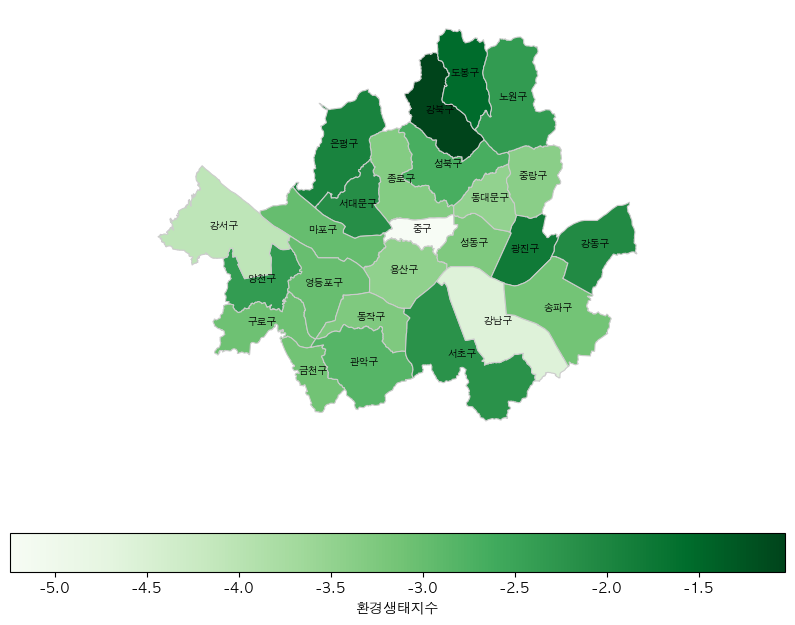

In [35]:
merged_df = pd.merge(seoul, env_index, on='자치구명')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_df.plot(column='환경생태지수', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "환경생태지수", 'orientation': "horizontal"})

for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['자치구명']):
    ax.text(x, y, label, fontsize=7, ha='center', weight='bold')

ax.axis('off')
plt.savefig('./result/seoul_env_index.png')
plt.show()

In [16]:
seoul

,자치구명,geometry
0,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."
5,동대문구,"POLYGON ((962141.919 1956519.461, 962149.853 1..."
6,중랑구,"POLYGON ((965698.531 1957987.355, 965772.290 1..."
7,성북구,"POLYGON ((956787.318 1953542.506, 956761.258 1..."
8,강북구,"POLYGON ((956316.789 1965175.345, 956401.551 1..."
9,도봉구,"POLYGON ((957223.835 1961199.545, 957195.758 1..."
